In [1]:
from sklearn import tree
import pandas as pd
import numpy as np


In [2]:
data = pd.DataFrame.from_csv('../../data/data.csv')

In [3]:
data = data[['period','shannon_entropy','mean_color_r','luminance','contrast', 'contour']]

In [4]:
data.head()

,period,shannon_entropy,mean_color_r,luminance,contrast,contour
0,themes_variations_59_60,7.683989,111.635539,104.752119,0.913992,0.001029
1,themes_variations_59_60,7.577162,179.380990,147.490592,0.691603,0.000051
2,themes_variations_59_60,7.579554,162.274002,126.479898,0.834955,0.000693
3,themes_variations_59_60,7.387632,103.497807,113.420688,0.848749,0.000054
4,themes_variations_59_60,7.853511,154.675751,127.536419,0.904835,0.001158


In [5]:
clf = tree.DecisionTreeClassifier()

In [6]:
from sklearn.model_selection import train_test_split

features = data[['shannon_entropy','mean_color_r','luminance','contrast', 'contour']]
target = data['period']
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=41)


In [7]:
clf.fit(features_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

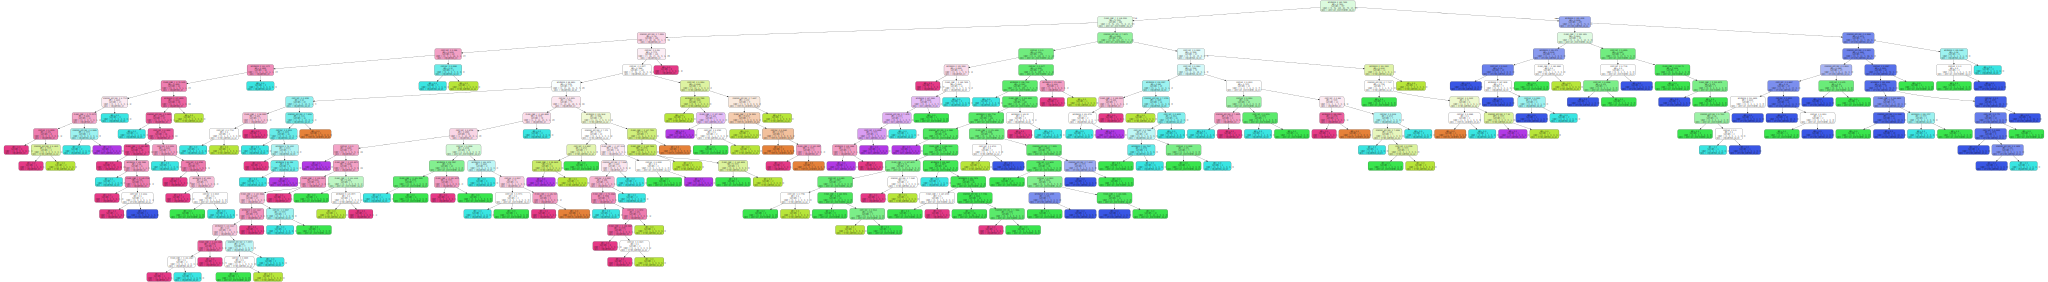

In [8]:
import graphviz 
dot_data = tree.export_graphviz(
   clf, out_file=None,
   feature_names=['shannon_entropy','mean_color_r','luminance','contrast', 'contour'],  
   class_names=list(target.unique()),  
   filled=True, rounded=True,  
   special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

graph = graphviz.Source(dot_data)  
graph

In [9]:
p = clf.predict(features_test)
for i in range(0, len(p)):
    print(p[i] == target_test.tolist()[i], p[i], target_test.tolist()[i])


False themes_variations_59_60 early_paintings_34_53
False veil_paintings_58_59 abstract_expressionist_55_57
False stripe_paintings_61_62 themes_variations_59_60
True veil_paintings_58_59 veil_paintings_58_59
False themes_variations_59_60 stripe_paintings_61_62
False veil_paintings_58_59 early_paintings_34_53
True stripe_paintings_61_62 stripe_paintings_61_62
True unfurled_paintings_60_61 unfurled_paintings_60_61
False themes_variations_59_60 unfurled_paintings_60_61
True themes_variations_59_60 themes_variations_59_60
True unfurled_paintings_60_61 unfurled_paintings_60_61
False unfurled_paintings_60_61 stripe_paintings_61_62
False stripe_paintings_61_62 unfurled_paintings_60_61
False veil_paintings_58_59 abstract_expressionist_55_57
False stripe_paintings_61_62 veil_paintings_58_59
True stripe_paintings_61_62 stripe_paintings_61_62
True stripe_paintings_61_62 stripe_paintings_61_62
True stripe_paintings_61_62 stripe_paintings_61_62
False unfurled_paintings_60_61 stripe_paintings_61_62


In [10]:
clf.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')>

In [11]:
import sklearn
sklearn.metrics.accuracy_score(target_test,clf.predict(features_test))

0.5903614457831325